In [1]:
#importing packages
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt, pandas as pd, numpy as np

In [2]:
#loading dataset
mnist = keras.datasets.mnist
(train_X, train_Y), (test_X, test_Y) = mnist.load_data()

In [3]:
#splitting training data into training & validation set
#stratify retains the ratio of classes
train_X, val_X, train_Y, val_Y = train_test_split(train_X, train_Y, test_size=0.1, stratify=train_Y, random_state=40)


print(f"Training Data - {train_X.shape}")
print(f"Validation Data - {val_X.shape}")
print(f"Test Data - {test_X.shape}")

Training Data - (54000, 28, 28)
Validation Data - (6000, 28, 28)
Test Data - (10000, 28, 28)


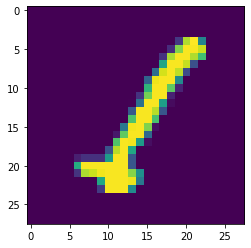

The letter is - 1


In [4]:
#displaying one image
plt.figure()
plt.imshow(train_X[0])
plt.show()
print(f"The letter is - {train_Y[0]}")

In [5]:
#setting up the network
model = keras.Sequential(
    [
        layers.Flatten(input_shape=(28,28)), #flatten the matrix in 1D
        layers.Dense(units=128, activation='relu'),
        layers.Dropout(rate=0.3),
        layers.BatchNormalization(),
        layers.Dense(units=50, activation='relu'),
        layers.Dropout(rate=0.3),
        layers.BatchNormalization(),
        layers.Dense(units=10),
        layers.Softmax()
    ]
)

#compiling model
model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#stops training if the validation accuracy dosent
#improve by atleast 0.01 in 10 epochs
early_stopping = keras.callbacks.EarlyStopping(patience=10, min_delta=0.01, restore_best_weights=True)

In [6]:
#training model
history = model.fit(
    train_X, train_Y,
    validation_data=(val_X, val_Y),
    batch_size=200,
    epochs=200,
    callbacks=[early_stopping])

Train on 54000 samples, validate on 6000 samples
Epoch 1/200
54000/54000 [==============================] - 2s 32us/sample - loss: 1.6981 - accuracy: 0.8231 - val_loss: 1.5393 - val_accuracy: 0.9313
Epoch 2/200
54000/54000 [==============================] - 1s 16us/sample - loss: 1.5529 - accuracy: 0.9247 - val_loss: 1.5156 - val_accuracy: 0.9507
Epoch 3/200
54000/54000 [==============================] - 1s 17us/sample - loss: 1.5324 - accuracy: 0.9386 - val_loss: 1.5074 - val_accuracy: 0.9568
Epoch 4/200
54000/54000 [==============================] - 1s 16us/sample - loss: 1.5207 - accuracy: 0.9476 - val_loss: 1.5012 - val_accuracy: 0.9622
Epoch 5/200
54000/54000 [==============================] - 1s 17us/sample - loss: 1.5151 - accuracy: 0.9512 - val_loss: 1.4995 - val_accuracy: 0.9628
Epoch 6/200
54000/54000 [==============================] - 1s 17us/sample - loss: 1.5110 - accuracy: 0.9545 - val_loss: 1.4963 - val_accuracy: 0.9660
Epoch 7/200
54000/54000 [==========================

Minimum validation loss: 1.4922278920809429


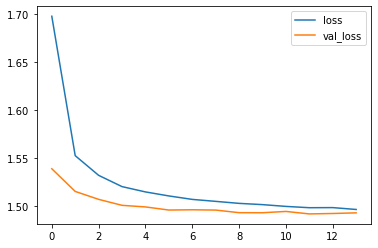

In [7]:
#learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

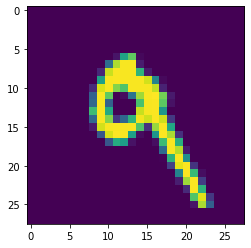

The model predicted - 9


In [8]:
#predicting on test dataset
preds = model.predict(test_X)

plt.figure()
plt.imshow(test_X[7])
plt.show()
print(f"The model predicted - {np.argmax(preds[7])}")

In [10]:
#model performance
model.evaluate(test_X, test_Y, verbose=2)

10000/1 - 0s - loss: 1.4810 - accuracy: 0.9631


[1.500489412689209, 0.9631]